# Imports

In [503]:
from tqdm import tqdm
import KSAT_properties
import importlib
import numpy as np
import SimAnn
import KSAT
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd

importlib.reload(SimAnn)
importlib.reload(KSAT)
importlib.reload(KSAT_properties)

<module 'KSAT_properties' from '/Users/vittoriomanfriani/Desktop/KSAT/KSAT_properties.py'>

# Acceptance Rate

## M = 200

In [453]:
ksat = KSAT.KSAT(200, 200, 3, seed=45)

best, acc_rate = SimAnn.simann(ksat,
                     mcmc_steps = 2000, anneal_steps =20,
                     beta0 = 1, beta1 = 10,
                     seed = 41,
                     debug_delta_cost = False,
                    optimize=False,
                    acceptance_rate=True)

Text(0, 0.5, 'Acc. Rate')

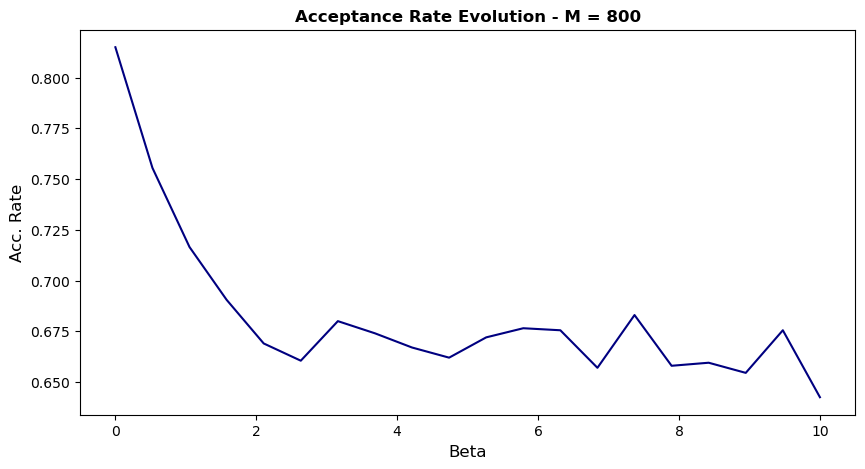

In [454]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(np.linspace(0, 10, 20), acc_rate, color = 'navy')
ax.set_title('Acceptance Rate Evolution - M = 200', fontsize=12, fontweight="bold")
ax.set_xlabel('Beta', fontsize=12)
ax.set_ylabel('Acc. Rate', fontsize=12)

## M = 800

In [457]:
ksat = KSAT.KSAT(200, 800, 3, seed=45)

best, acc_rate = SimAnn.simann(ksat,
                     mcmc_steps = 2000, anneal_steps =20,
                     beta0 = 1, beta1 = 10,
                     seed = 41,
                     debug_delta_cost = False,
                    optimize=False,
                    acceptance_rate=True)

Text(0, 0.5, 'Acc. Rate')

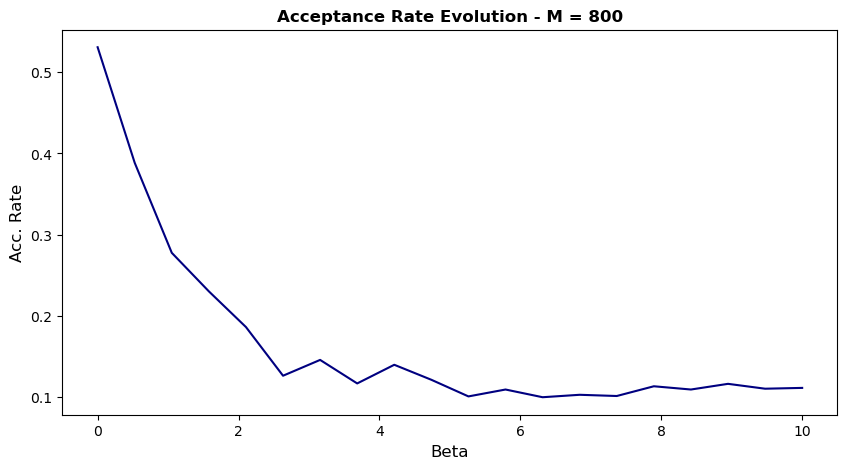

In [458]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(np.linspace(0, 10, 20), acc_rate, color = 'navy')
ax.set_title('Acceptance Rate Evolution - M = 800', fontsize=12, fontweight="bold")
ax.set_xlabel('Beta', fontsize=12)
ax.set_ylabel('Acc. Rate', fontsize=12)

# Percentage Solved for different values of M and N = 200

In [476]:
M = [400, 500, 600, 700, 800, 900, 1000]
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m)


100%|██████████| 7/7 [01:39<00:00, 14.28s/it]


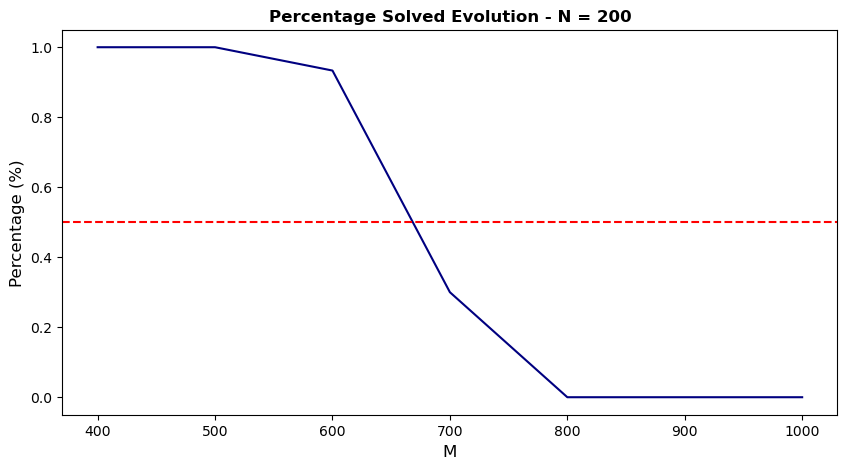

In [477]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(percentage_solved.keys(), percentage_solved.values(), color = 'navy')
ax.set_title('Percentage Solved Evolution - N = 200', fontsize=12, fontweight="bold")
ax.set_xlabel('M', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.axhline(y = 0.5, linestyle = '--', color = 'red')

In [473]:
percentage_solved

{400: 1.0,
 500: 1.0,
 600: 1.0,
 700: 0.9666666666666667,
 800: 0.0,
 900: 0.0,
 1000: 0.0}

# Algorithmic Threshold Analysis

## Finding M_alg Values through Binary Search

In [434]:
N = [200,300,400,500,600]
M_alg = {}

In [435]:
for n in tqdm(N):
    mid_M = KSAT_properties.find_threshold(n, target_prob=0.5, min_M=100, max_M=2000)
    M_alg[n] = mid_M

100%|██████████| 5/5 [16:29<00:00, 197.84s/it]


In [443]:
M_alg

{200: 611, 300: 797, 400: 961, 500: 1040, 600: 1092}

Text(0, 0.5, 'M')

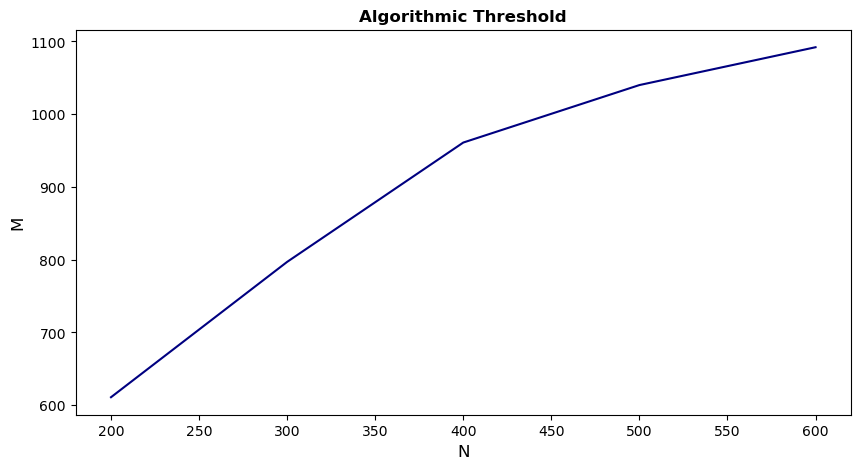

In [437]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(M_alg.keys(), M_alg.values(), color = 'navy')
ax.set_title('Algorithmic Threshold', fontsize=12, fontweight="bold")
ax.set_xlabel('N', fontsize=12)
ax.set_ylabel('M', fontsize=12)

## System of Variables around M_alg

In [504]:
M_200 = [400, 500, 600, 700, 800, 900, 1000]
percentage_solved_200 = {}
for m in tqdm(M_200):
    percentage_solved_200[m] = KSAT_properties.empirical_probability(m, N = 200)


100%|██████████| 7/7 [01:04<00:00,  9.28s/it]


In [509]:
M_300 = [500, 600, 700, 800, 900, 1000, 1100]
percentage_solved_300 = {}
for m in tqdm(M_300):
    percentage_solved_300[m] = KSAT_properties.empirical_probability(m, N = 300)

100%|██████████| 7/7 [01:37<00:00, 13.90s/it]


In [512]:
M_400 = [600, 700, 800, 900, 1000, 1100, 1200]
percentage_solved_400 = {}
for m in tqdm(M_400):
    percentage_solved_400[m] = KSAT_properties.empirical_probability(m, N = 400)

100%|██████████| 7/7 [02:18<00:00, 19.82s/it]


In [440]:
M_500 = [700, 800, 900, 1000, 1100, 1200, 1300]
percentage_solved_500 = {}
for m in tqdm(M_500):
    percentage_solved_500[m] = KSAT_properties.empirical_probability(m, N = 500)

100%|██████████| 7/7 [02:59<00:00, 25.62s/it]


In [441]:
M_600 = [800, 900, 1000, 1100, 1200, 1300, 1400]
percentage_solved_600 = {}
for m in tqdm(M_600):
    percentage_solved_600[m] = KSAT_properties.empirical_probability(m, N = 600)

100%|██████████| 7/7 [03:53<00:00, 33.34s/it]


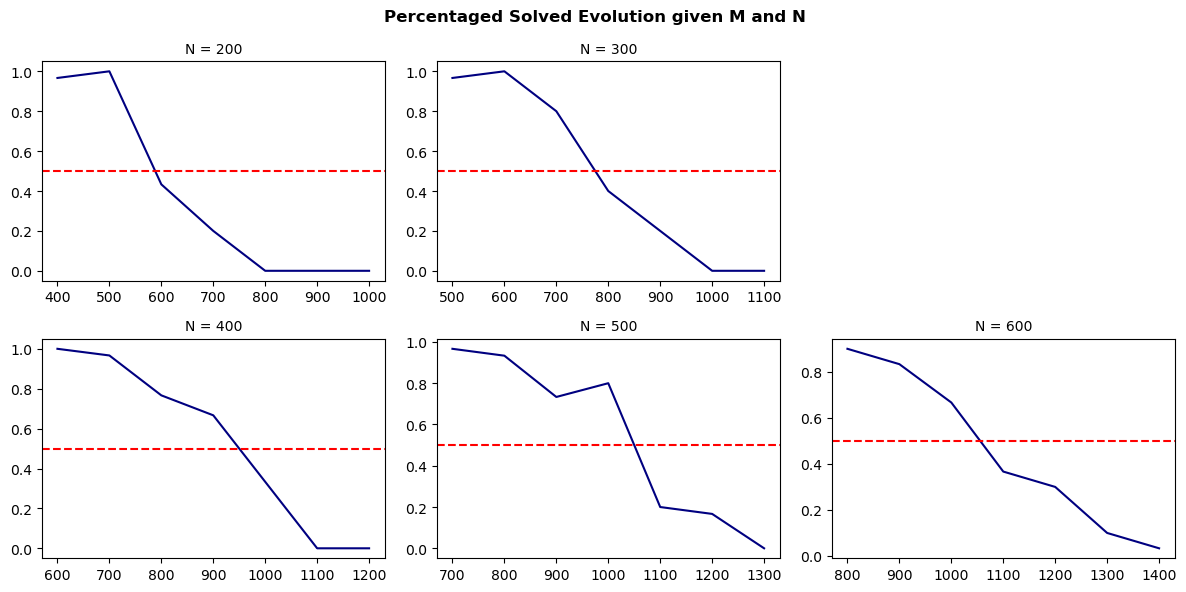

In [547]:
# Create a GridSpec layout for 2 rows and uneven column widths
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 3, figure=fig)  # 2 rows, 3 columns

# Create 5 subplots across the GridSpec layout
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

ax1.plot(percentage_solved_200.keys(), percentage_solved_200.values(), color = 'navy')
ax1.axhline(y = 0.5, linestyle = '--', color = 'red')
ax1.set_title('N = 200', fontsize=10)

ax2.plot(percentage_solved_300.keys(), percentage_solved_300.values(), color = 'navy')
ax2.axhline(y = 0.5, linestyle = '--', color = 'red')
ax2.set_title('N = 300', fontsize=10)

ax3.plot(percentage_solved_400.keys(), percentage_solved_400.values(), color = 'navy')
ax3.axhline(y = 0.5, linestyle = '--', color = 'red')
ax3.set_title('N = 400', fontsize=10)

ax4.plot(percentage_solved_500.keys(), percentage_solved_500.values(), color = 'navy')
ax4.axhline(y = 0.5, linestyle = '--', color = 'red')
ax4.set_title('N = 500', fontsize=10)

ax5.plot(percentage_solved_600.keys(), percentage_solved_600.values(), color = 'navy')
ax5.axhline(y = 0.5, linestyle = '--', color = 'red')
ax5.set_title('N = 600', fontsize=10)

fig.suptitle("Percentaged Solved Evolution given M and N", fontsize=12, fontweight="bold")
plt.tight_layout()

In [489]:
N = np.array([200,300,400,500,600])
M = np.array(list(M_alg.values()))
alpha_values =  M/ N

# Collapsing Curve

In [535]:
# Initialize dataset to store values of P(M, N)
probabilities = pd.DataFrame(index = np.linspace(200, 1500, 14))
probabilities['200'] = percentage_solved_200
probabilities['300'] = percentage_solved_300
probabilities['400'] = percentage_solved_400
probabilities['500'] = percentage_solved_500
probabilities['600'] = percentage_solved_600
# Fill upper NaNs with 1
probabilities.iloc[:8] = probabilities.iloc[:8].fillna(1)
#Fill lowert NaNs with 0
probabilities.iloc[9:] = probabilities.iloc[9:].fillna(0)

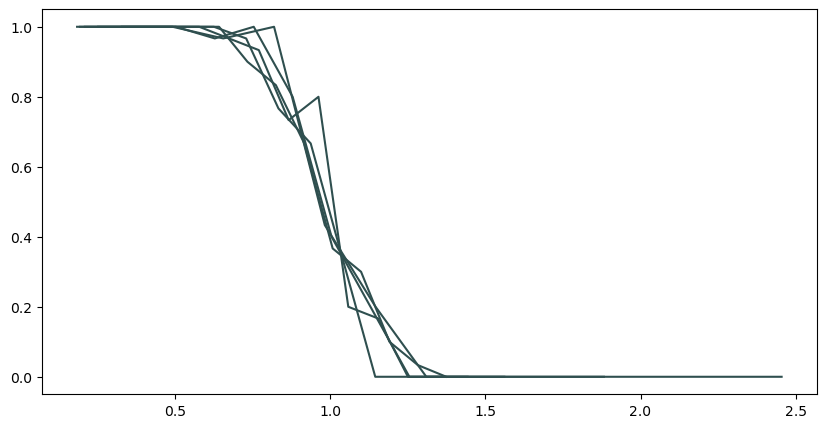

In [546]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(probabilities['200'].index / M_alg[200], probabilities['200'].values, color = 'darkslategray')
ax.plot(probabilities['300'].index / M_alg[300], probabilities['300'].values, color = 'darkslategray')
ax.plot(probabilities['400'].index / M_alg[400], probabilities['400'].values, color = 'darkslategray')
ax.plot(probabilities['500'].index / M_alg[500], probabilities['500'].values, color = 'darkslategray')
ax.plot(probabilities['600'].index / M_alg[600], probabilities['600'].values, color = 'darkslategray')